In [44]:
%%javascript
var rate = 0;
// apply setting to  all current CodeMirror instances
IPython.notebook.get_cells().map(
    function(c) {  return c.code_mirror.options.cursorBlinkRate=rate;  }
);

<IPython.core.display.Javascript object>

In [45]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import corner
import seaborn as sns
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
# sns.set_style('white')
# sns.set_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 20, "xtick.direction": 'in', "ytick.direction": 'in'})
mpl.rcParams['figure.dpi']= 400
%matplotlib inline
from orvara import corner_modified
from orvara.format_fits import pull_chain_params, burnin_chain

In [46]:
path = '/Users/yunlin/Dropbox (GaTech)/physics/research/Gl86/MCMC_chains_from_orvara/'

In [48]:
# starting from here, run via orvara

# 5/8/2021 the maxjitter = 10, no primary mass prior, did not modify any initial guess in the main.py
# 8747 seconds
# Looks bad. Many variables have not converged.
# file = 'Gl86B_chain000.fits'

# 5/9/2021 the maxjitter = 10, no primary mass prior, set proper initial guess in the main.py
# 9871 seconds
# m_plt is kind of rough
# file = 'Gl86B_chain001.fits'
# plx_ML = 0.09291466424530037
# pmra_ML = 2.14464019714073
# pmdec_ML = 0.6699981987387541
# chisq_sep = 43.68128826275994
# chisq_PA = 36.95244362569012
# chisq_H = 3.1029455897589435
# chisq_HG = 0.000531655740450169
# chisq_G = 2.316756536807649

# 5/10/2021 same setup as above but add prior for the primary mass
# 9644 seconds
# file = 'Gl86B_chain002.fits'
# plx_ML = 0.09292324469465785
# pmra_ML = 2.1442534233754826
# pmdec_ML = 0.6692897046134811
# chisq_sep = 47.84199190139194
# chisq_PA = 36.93310194759442
# chisq_H = 2.997670208437443
# chisq_HG = 0.005512515346688898
# chisq_G = 2.7765011909304587

# 5/11/2021 Same setup as the previous one, but C_G*1000
# file = 'Gl86B_chain003.fits'
# plx_ML = 0.09291431520519366
# pmra_ML = 2.1423143584299993
# pmdec_ML = 0.6715839441162967
# chisq_sep = 5.153416423998537
# chisq_PA = 28.389226021993792
# chisq_H = 0.2687348394337423
# chisq_HG = 0.020705416767357706
# chisq_G = 12.311844529453122

# 5/11/2021 Same as previous setup, but C_G, C_HG, C_H all *1000
# file = 'Gl86B_chain004.fits'
# plx_ML = 0.09292878278387617
# pmra_ML = 2.141389873784967
# pmdec_ML = 0.6704572841374004
# chisq_sep = 5.22423135832034
# chisq_PA = 24.98866036315278
# chisq_H = 0.007073573856928783
# chisq_HG = 1.8451603297662031
# chisq_G = 8.360271109898786

# 5/11/2021 Same as previous setup, but C_G*100000
# file = 'Gl86B_chain005.fits'
# plx_ML = 0.09292364847974299
# pmra_ML = 2.1418220811891366
# pmdec_ML = 0.6709026267670523
# chisq_sep = 5.510412612409267
# chisq_PA = 28.458165816958484
# chisq_H = 0.11556172744392507
# chisq_HG = 0.006694489854403368
# chisq_G = 1.3906328991992192

# 5/24/2021 eRA, eDec, corr = [100000*1e-3*t['pmra_gaia_error'], 100000*1e-3*t['pmdec_gaia_error'], 100000*t['pmra_pmdec_gaia']]
# (actually I am not sure) forget to uncomment init = [1.5, 1., 0.6, 22, -0.54, 0.49, 2.18, 4.05, 1.9, 0.004, 0.11, -0.22, -0.1, 1, 1, 4.04]
# file = 'Gl86B_chain006.fits'
# plx_ML = 0.0929874940096791
# pmra_ML = 2.1425610918665265
# pmdec_ML = 0.6653567874754761
# chisq_sep = 202.24114329377045
# chisq_PA = 12.597534994894307
# chisq_H = 71.67867795143523
# chisq_HG = 1.8354688448568715
# chisq_G = 196.6528592285863

# eRA, eDec, corr = [100000*1e-3*t['pmra_gaia_error'], 100000*1e-3*t['pmdec_gaia_error'], 100000*t['pmra_pmdec_gaia']]
# this time setup the proper initial guess for MCMC
# file = 'Gl86B_chain007.fits'
# plx_ML = 0.09293467473057959
# pmra_ML = 2.1419179316861983
# pmdec_ML = 0.6712889671339427
# chisq_sep = 5.200258613034714
# chisq_PA = 29.08949753798371
# chisq_H = 0.27684269102708947
# chisq_HG = 0.011891108244258574
# chisq_G = 1.4038368208157275

# same as above
# file = 'Gl86B_chain008.fits'
# plx_ML = 0.09293306582908656
# pmra_ML = 2.1419509081605006
# pmdec_ML = 0.6711041313851513
# chisq_sep = 5.332249503793439
# chisq_PA = 28.398702721872787
# chisq_H = 0.0881877988930182
# chisq_HG = 0.007913376101612793
# chisq_G = 1.466197341592503

# see what happens if I only fit one companion. 
# The initial guess for MCMC is the default initial guess in main.py.
# C_G = 100000*np.asarray([[eRA**2, eRA*eDec*corr], [eRA*eDec*corr, eDec**2]])
# nplanets = 1
# nstep = 75000
# 2376 seconds
# file = 'Gl86B_chain009.fits'
# plx_ML = 0.09292663297125725
# pmra_ML = 2.1502329613768127
# pmdec_ML = 0.676605099415126
# chisq_sep = 91.24566667916721
# chisq_PA = 35.447768416375936
# chisq_H = 135.74292543328806
# chisq_HG = 0.15793888089269537
# chisq_G = 0.13251063198174307

# same as above but C_H = 100000*np.asarray([[eRA**2, eRA*eDec*corr], [eRA*eDec*corr, eDec**2]]) instead of C_G
# file = 'Gl86B_chain010.fits'
# plx_ML = 0.09292663157305137
# pmra_ML = 2.1454785008311448
# pmdec_ML = 0.6718793881805447
# chisq_sep = 40.65671095535308
# chisq_PA = 36.191701698168046
# chisq_H = 0.00020869264933479878
# chisq_HG = 0.8803766523335027
# chisq_G = 25.365070961911673

# same as above but C_HG = 100000*np.asarray([[eRA**2, eRA*eDec*corr], [eRA*eDec*corr, eDec**2]]) instead of C_H
# file = 'Gl86B_chain011.fits'
# plx_ML = 0.0929176004749764
# pmra_ML = 2.1467893011016272
# pmdec_ML = 0.6738783688411296
# chisq_sep = 51.29971930559375
# chisq_PA = 41.95391901094142
# chisq_H = 61.56516512055986
# chisq_HG = 0.14479004480249047
# chisq_G = 1.7563032815620792
# looks like chisq_HG and chisq_G are both insensitive to the change of C_HG and C_G, respectively.

In [49]:
# Gl 86 data
dat_pmra_G = 2.1254162788391113   # 1e-3*t['pmra_gaia']
dat_pmdec_G = 0.6379750967025757   # 1e-3*t['pmdec_gaia']
dat_eRA_G = 6.557805e-05   # 1e-3*t['pmra_gaia_error']
dat_eDec_G = 8.4334875e-05   # 1e-3*t['pmdec_gaia_error']
dat_corr_G = -0.43130413   # t['pmra_pmdec_gaia']

C_G = np.array([[4.3004809e-09, -2.3853348e-09], [-2.3853348e-09, 7.1123711e-09]])
Cinv_G = np.linalg.inv(C_G.reshape(2, 2)).astype(float)
# print(Cinv_G)
# [[2.85674176e+08 9.58089143e+07]
#  [9.58089143e+07 1.72732317e+08]]

C_G_ifl = 100000*np.array([[4.3004809e-09, -2.3853348e-09], [-2.3853348e-09, 7.1123711e-09]])
Cinv_G_ifl = np.linalg.inv(C_G_ifl.reshape(2, 2)).astype(float)
# print(Cinv_G_ifl)
# [[2856.74176004  958.08914341]
#  [ 958.08914341 1727.32316727]]   # much smaller

def f_deltaRA(plx_best, mod_pmra_G, dat_pmra_G, pmra_best):
    return plx_best*mod_pmra_G - dat_pmra_G + pmra_best

def f_deltaDec(plx_best, mod_pmdec_G, dat_pmdec_G, pmdec_best):
    return plx_best*mod_pmdec_G - dat_pmdec_G + pmdec_best

def chisq_G1(deltaRA, Cinv_G):
    return deltaRA**2*Cinv_G[0, 0]

def chisq_G2(deltaDec, Cinv_G):
    return deltaDec**2*Cinv_G[1, 1]

def chisq_G3(deltaRA, deltaDec, Cinv_G):
    return 2*deltaRA*deltaDec*Cinv_G[0, 1]

def chisq_G_tot(deltaRA, deltaDec, Cinv_G):
    return chisq_G1(deltaRA, Cinv_G) + chisq_G2(deltaDec, Cinv_G) + chisq_G3(deltaRA, deltaDec, Cinv_G)

In [50]:
# starting from here:
# if chisq_resids:
#     chisq_struct = Chisq_resids()
#     chisq_struct.plx_best = plx_best
#     chisq_struct.pmra_best = pmra_best
#     chisq_struct.pmdec_best = pmdec_best
#     chisq_struct.chisq_PA = model.pmra_G
#     chisq_struct.chisq_sep = model.pmdec_G
#     chisq_struct.chisq_H = deltaRA
#     chisq_struct.chisq_HG = deltaDec
#     chisq_struct.chisq_G = chisq_G

# nstep = 7500, C_G = np.asarray([[eRA**2, eRA*eDec*corr], [eRA*eDec*corr, eDec**2]])
# file = 'Gl86B_chain012.fits'
# plx_ML = 0.09293136360517518
# pmra_ML = 2.1452528356849108
# pmdec_ML = 0.6714342489193081
# model.pmdec_G = -0.35730847084020956
# model.pmdec_G = -0.21437334368299038
# deltaRA = 1.9548058379559308e-05
# deltaDec = 9.88629650822137e-06
# chisq_G = 9.09945355441429
# for 012
# print(deltaRA**2*Cinv_G[0, 0], deltaDec**2*Cinv_G[1, 1], 2*deltaRA*deltaDec*Cinv_G[0, 1])
# 0.10916369770210355 0.016882659488650746 0.03703165942294654
# But these three numbers do not add up to be chisq_G (Later found out that's because of taking into account the companion's astrometry)

# nstep = 7500, C_G = 100000*np.asarray([[eRA**2, eRA*eDec*corr], [eRA*eDec*corr, eDec**2]])
# file = 'Gl86B_chain013.fits'
# plx_ML = 0.09293898276721013
# pmra_ML = 2.1479359030240213
# pmdec_ML = 0.6738608576121076
# model.pmra_G = -0.37976616289600257
# model.pmdec_G = -0.21546676888825986
# deltaRA = -2.196620547989525e-05
# deltaDec = -0.00010043830814987498
# chisq_G = 0.3597118029176157
# for 013
# print(deltaRA**2*Cinv_G[0, 0], deltaDec**2*Cinv_G[1, 1], 2*deltaRA*deltaDec*Cinv_G[0, 1])
# 1.3784184169163415e-06 1.7424983480107836e-05 4.227565499544206e-06
# But these three numbers do not add up to be chisq_G (Later found out that's because of taking into account the companion's astrometry)

# starting from here:
# chisq_struct.chisq_PA = chisq_G0
# chisq_struct.chisq_sep = chisq_G1
# chisq_struct.chisq_H = chisq_G2
# chisq_struct.chisq_HG = chisq_G3
        
# nstep = 7500, C_G = np.asarray([[eRA**2, eRA*eDec*corr], [eRA*eDec*corr, eDec**2]])
# file = 'Gl86B_chain014.fits'
# plx_ML = 0.09292987253960727
# pmra_ML = 2.145464100325038
# pmdec_ML = 0.671624117678733
# chisq_G0 = 0.0
# chisq_G1 = 3.0063398683455853
# chisq_G2 = 15.81397963108434
# chisq_G3 = 10.461349933820063
# chisq_G = 11.67483058079522   

# in config.ini, set companion_ID = -1. 
# file = 'Gl86B_chain015.fits'
# plx_ML = 0.0929324691833594
# pmra_ML = 2.147425180031709
# pmdec_ML = 0.6734641569126376
# chisq_G0 = 0.0
# chisq_G1 = 1.8356449273697184
# chisq_G2 = 11.010023769387463
# chisq_G3 = 7.470080652983034
# chisq_G = 7.470080652983034   # found the last two are now the same because Gl 86B's proper motion is taken into account 

In [51]:
# starting from here:
# chisq_struct.plx_best = plx_best
# chisq_struct.pmra_best = pmra_best
# chisq_struct.pmdec_best = pmdec_best
# chisq_struct.chisq_PA = model.pmra_G
# chisq_struct.chisq_sep = model.pmdec_G
# chisq_struct.chisq_H = deltaRA
# chisq_struct.chisq_HG = deltaDec
# chisq_struct.chisq_G = chisq_G

# did not multiple 100000 for gaia
# file = 'Gl86B_chain016.fits'
# plx_ML = 0.09293357677946867
# pmra_ML = 2.1471094155549433
# pmdec_ML = 0.6729000202877917
# mod_pmra_G = -0.23427397457396137
# mod_pmdec_G = -0.3729723978896173
# deltaRA = -7.878168766861648e-05
# deltaDec = 0.0002632646093188029
# chisq_G = 9.770591778563567
# print(chisq_G1(deltaRA, Cinv_G), chisq_G2(deltaDec, Cinv_G),
#       chisq_G3(deltaRA, deltaDec, Cinv_G), chisq_G_tot(deltaRA, deltaDec, Cinv_G))
# 1.7730522888807967 11.971775371540346 -3.9742362057656386 9.770591454655504

# multiply C_G by 100000
# file = 'Gl86B_chain017.fits'
# plx_ML = 0.09292310593463182
# pmra_ML = 2.149356250051317
# pmdec_ML = 0.6746835959725896
# mod_pmra_G = -0.23786728293644627
# mod_pmdec_G = -0.3893642085889249
# deltaRA = 0.0018366044815194549
# deltaDec = 0.0005275676681512076
# chisq_G = 0.011973532002116268
# print(chisq_G1(deltaRA, Cinv_G), chisq_G2(deltaDec, Cinv_G),
#       chisq_G3(deltaRA, deltaDec, Cinv_G), chisq_G_tot(deltaRA, deltaDec, Cinv_G))
# 0.009636121400187245 0.00048076178840076504 0.0018566486512132266 0.011973531839801236

# upon observing the results obtained above, everything makes sense
# try running nstep = 75000 and nplanet = 1 again and see what happens, without multiplying 100000
# previous I forget to change companion_ID to -1, but the resulting chisq_G was still large,
# given C_G was multiplied by 100000
# file = 'Gl86B_chain018.fits'
# plx_ML = 0.0929129893797912
# pmra_ML = 2.1476626123484706
# pmdec_ML = 0.6735271352930072
# mod_pmra_G = -0.2403309077218554
# mod_pmdec_G = -0.3800111087602849
# deltaRA = -8.352956743706841e-05
# deltaDec = 0.00024407047798447046
# chisq_G = 8.376403685375719
# print(chisq_G1(deltaRA, Cinv_G), chisq_G2(deltaDec, Cinv_G),
#       chisq_G3(deltaRA, deltaDec, Cinv_G), chisq_G_tot(deltaRA, deltaDec, Cinv_G))
# 1.9932026144780102 10.289732893535936 -3.906532113021395 8.37640339499255

# C_G multiplied by 100000
# file = 'Gl86B_chain019.fits'
# plx_ML = 0.09292165030892963
# pmra_ML = 2.1524751681423564
# pmdec_ML = 0.6786120390033019
# mod_pmra_G = -0.24560369460612225
# mod_pmdec_G = -0.4272943260555473
# deltaRA = 0.004236988678473885
# deltaDec = 0.0009320483560029125
# chisq_G = 0.060352125830050445
# print(chisq_G1(deltaRA, Cinv_G), chisq_G2(deltaDec, Cinv_G),
#       chisq_G3(deltaRA, deltaDec, Cinv_G), chisq_G_tot(deltaRA, deltaDec, Cinv_G))
# 0.05128443679412967 0.0015005500561818 0.007567138153091619 0.06035212500340308


# G_C *100000 nplanets = 2 nstep = 200000 companion_ID = 0
# forget to give it good initial guess
# file = 'Gl86B_chain020.fits'
# plx_ML = 0.09241255732052
# pmra_ML = 2.146375158262665
# pmdec_ML = 0.6731940740419947
# chisq_PA = -0.20308579391490827
# chisq_sep = -0.37551734298201883
# chisq_H = -0.0015512635600587465
# chisq_HG = 0.0010542492644409762
# chisq_G = 110.98965497635132

# same as above, with good initial guess
# file = 'Gl86B_chain021.fits'
# plx_ML = 0.0929413208036457
# pmra_ML = 2.1417277762091986
# pmdec_ML = 0.6707861623425394
# mod_pmra_G = -0.2373525438900251
# mod_pmdec_G = -0.34729539517332525
# deltaRA = 7.324571598577023e-05
# deltaDec = -0.00022532042776501893
# chisq_G = 1.127497015838362
# print(chisq_G1(deltaRA, Cinv_G), chisq_G2(deltaDec, Cinv_G),
#       chisq_G3(deltaRA, deltaDec, Cinv_G), chisq_G_tot(deltaRA, deltaDec, Cinv_G))
# 1.5326233598061805e-05 8.769497973026787e-05 -3.162413900917693e-05 7.139707431915273e-05
# the three numbers above does not add up to the total chisq_G. 
# It means it must be caused by the companion's astrometry.
# This happens should be because I forget to inflate the companion's astrometry error.
# Next, change companion_ID = -1 and fit 2 companions and see if the chisq_G equals to the sum of the three components.

# change companion_ID = -1
# file = 'Gl86B_chain022.fits'
# plx_ML = 0.0929421823092722
# pmra_ML = 2.1425310226155676
# pmdec_ML = 0.6700747793557673
# mod_pmra_G = -0.2422964148238436
# mod_pmdec_G = -0.33946060108081305
# deltaRA = -0.005404813782984519
# deltaDec = 0.0005494735807235474
# chisq_G = 0.0782820203783857   # this number is expected to be 2 orders of magnitude higher if not multiplied by 100000
# print(chisq_G1(deltaRA, Cinv_G), chisq_G2(deltaDec, Cinv_G),
#       chisq_G3(deltaRA, deltaDec, Cinv_G), chisq_G_tot(deltaRA, deltaDec, Cinv_G))
# 0.08345117465730394 0.0005215155109385978 -0.005690670841476039 0.0782820193267665
# print(
# chisq_G1(f_deltaRA(plx_ML, mod_pmra_G, dat_pmra_G, pmra_ML), Cinv_G_ifl),
# chisq_G2(f_deltaDec(plx_ML, mod_pmdec_G, dat_pmdec_G, pmdec_ML), Cinv_G_ifl),
# chisq_G3(f_deltaRA(plx_ML, mod_pmra_G, dat_pmra_G, pmra_ML), 
#          f_deltaDec(plx_ML, mod_pmdec_G, dat_pmdec_G, pmdec_ML),
#          Cinv_G_ifl)
# )
# 0.08345117465730394 0.0005215155109385978 -0.005690670841476039   # same as above

# This is a test with nsteps = 2000, after adding the 8 extra variables to the fits file
# file = 'Gl86B_chain023.fits'

# A regular run with nsteps = 200000. 
# Including a new relAst data point from Tim
# file = 'Gl86B_chain024.fits'
# plx_ML = 0.09292025383137359
# pmra_ML = 2.1437954895300004
# pmdec_ML = 0.6685634568545911
# chisq_PA = 50.88076922210062
# chisq_sep = 65.14322537350981
# chisq_H = 1.7548959050903246
# chisq_HG = 0.016370848994150665
# chisq_G = 2.8563790240250118
# mod_pmra_G = -0.19813241544670054
# mod_pmdec_G = -0.3290329513638484
# deltaRA_G = -3.130364464132285e-05
# deltaDec_G = 1.453479240054456e-05
# mod_pmra_G_B = 0.27166675607714247
# mod_pmdec_G_B = 0.45133131528649684
# deltaRA_G_B = 0.0001528223291691333
# deltaDec_G_B = -0.0003464498908021252

# inflate all Gaia error by 100 (C_G *= 1e4)
# file = 'Gl86B_chain025.fits'
# plx_ML = 0.09293203110339676
# pmra_ML = 2.143105051444232
# pmdec_ML = 0.6711081220575559
# chisq_PA = 22.995638222433932
# chisq_sep = 4.25619152983822
# chisq_H = 0.16837146125751506
# chisq_HG = 0.0001556143781907558
# chisq_G = 0.9181751147371632
# mod_pmra_G = -0.25287420758096313
# mod_pmdec_G = -0.3501547327591992
# deltaRA_G = -0.005811341119040581
# deltaDec_G = 0.000592434839200684
# mod_pmra_G_B = 0.2941924961897172
# mod_pmdec_G_B = 0.4072378201094174
# deltaRA_G_B = 0.0015589465174552508
# deltaDec_G_B = -0.0018941673014183369

# inflate all Gaia error by 10 (C_G *= 1e2)
# file = 'Gl86B_chain026.fits'
# plx_ML = 0.09294007682542305
# pmra_ML = 2.1430418729840763
# pmdec_ML = 0.6673875792509711
# chisq_PA = 16.536813150998906
# chisq_sep = 45.14166175112031
# chisq_H = 2.7493908391545334
# chisq_HG = 0.012630323328315863
# chisq_G = 12.30138183328585
# mod_pmra_G = -0.21082892602626271
# mod_pmdec_G = -0.31433169260117166
# deltaRA_G = -0.0019688624369371688
# deltaDec_G = 0.00019847088937730017
# mod_pmra_G_B = 0.29232465166698224
# mod_pmdec_G_B = 0.43597514249399094
# deltaRA_G_B = 0.0013245374349053485
# deltaDec_G_B = -0.0029405846355247123

# get rid of the last three relAst data points, see if the relAst's chi2's get better
# file = 'Gl86B_chain027.fits'
# plx_ML = 0.09291838835240296
# pmra_ML = 2.1425387701759933
# pmdec_ML = 0.6667180326073452
# chisq_PA = 4.930544700434124
# chisq_sep = 9.918227759444376
# chisq_H = 1.0564628123822988
# chisq_HG = 0.03277104845443315
# chisq_G = 0.8149788518802965
# mod_pmra_G = -0.18441549670778948
# mod_pmdec_G = -0.3086350143084827
# deltaRA_G = -1.3099404413630111e-05
# deltaDec_G = 6.506778610448904e-05
# mod_pmra_G_B = 0.2839669878635273
# mod_pmdec_G_B = 0.47545998316566374
# deltaRA_G_B = 3.851390049325332e-05
# deltaDec_G_B = 4.9280845297206e-05

# C_G *= 1e4; without last three relAst
# file = 'Gl86B_chain028.fits'
# plx_ML = 0.09292621850045057
# pmra_ML = 2.1424115830427466
# pmdec_ML = 0.6696298927713017
# chisq_PA = 1.4754527506559751
# chisq_sep = 8.300429396909225
# chisq_H = 0.12586747680920185
# chisq_HG = 0.00013182938318228397
# chisq_G = 0.1333390501734053
# mod_pmra_G = -0.17952696105894547
# mod_pmdec_G = -0.33756765944147127
# deltaRA_G = 0.0003125425935497361
# deltaDec_G = 0.00028590998878219587
# mod_pmra_G_B = 0.27892476182886367
# mod_pmdec_G_B = 0.5246238128479841
# deltaRA_G_B = -0.0005550047274236469
# deltaDec_G_B = 0.007533472710690825

# inflate the errors of the last three
# Gl86_relAST00_inflate_last_three.txt
# file = 'Gl86B_chain029.fits'
# chisq_PA = 9.475115291608397
# chisq_sep = 19.77759055306856

# inflate the errors of the last three
# the errors of the last three are the average of the first five, for both relsep and PA 
# Gl86_relAST00_inflate_last_three_2.txt
# file = 'Gl86B_chain030.fits'
# chisq_PA = 6.7798894740469136
# chisq_sep = 16.268713980376653

# see what happens if I only use the last three relAst data points
# Gl86_relAST00_only_last_three.txt
# file = 'Gl86B_chain031.fits'
# chisq_PA = 41.31872738905161
# chisq_sep = 24.49636121762741

# use the relAst according to Tim's 2019 paper
# file = 'Gl86B_chain032.fits'
# chisq_PA = 6.5853053745205195
# chisq_sep = 26.99875500831479

# use the relAst according to Tim's 2019 paper
# remove the companion's absAst 
# config_Tim2019_paper.ini
# file = 'Gl86B_chain033.fits'
# chisq_PA = 5.319312815484006
# chisq_sep = 14.022188193061387

# A regular run, and use the most highest probability step of 024.fits as the init in main.py
# [jit, mpri] + [msec, sau, esino, ecoso, inc, asc, lam] + [msec, sau, esino, ecoso, inc, asc, lam]
# init = [4.916633049610304, 0.733449602459696, 0.5374948003027953, 24.98292534436825, -0.23885406268549525, 0.5780587941330382, 2.2268943815829254, 4.051453071356564, 1.6270277383154557, 0.003782899868005877, 0.11115635897911545, -0.2202217611827764, 0.003126730232583386, 1.287784270021562, -1.6151636269122291, 4.411424285678716]
# file = 'Gl86B_chain034.fits'
# save the last step of par in the file1
# file1 = 'Gl86B_chain034_par_last.fits'
# chisq_PA = 50.23454661193357
# chisq_sep = 61.0502532712306

# preceded by 034.fits
file = 'Gl86B_chain035.fits'
# chisq_PA = 50.47904274926972
# chisq_sep = 59.40674368513169

# receded by 035.fits
# file = 'Gl86B_chain036.fits'
# chisq_PA = 48.58979327922485
# chisq_sep = 62.969231868139495

# Gl86_relAST00_plus_Tim2019_inflate_Farihi2016.txt
# file = 'Gl86B_chain037.fits'
# chisq_PA = 37.34576418166753
# chisq_sep = 54.112638218975235

# use Tim dynamical paper's result as the prior of Gl 86A's mass
# file = 'Gl86B_chain038.fits'

# use only the last two HST points.
file = 'Gl86B_chain039.fits'

In [52]:
source = file.split('_')[0][:4]
burnin = 2500

# how the data were read in orbit_plot.py's load_mcmc_data function
header0 = fits.open(path + file)[0].header
header1 = fits.open(path + file)[1].header
chain = fits.open(path + file)[1].data
chain_after_burnin = burnin_chain(chain.columns, burnin, reshape=True)   # was named as chain in orbit_plot.py

nsteps = np.shape(chain['mpri'])[1]*50

In [54]:
# print(header0)
# nplanets = int(fits.open(file)[0].header['nplanets'])

In [55]:
# print(header1)

In [75]:
par_label = ['plx_ML', 'pmra_ML', 'pmdec_ML', 'chisq_PA', 'chisq_sep', 'chisq_H', 'chisq_HG', 'chisq_G']
# par_label += ['mod_pmra_G', 'mod_pmdec_G', 'deltaRA_G', 'deltaDec_G']
# par_label += ['mod_pmra_G_B', 'mod_pmdec_G_B', 'deltaRA_G_B', 'deltaDec_G_B']
lnp = chain_after_burnin['lnp']   # be careful lnp = chain_after_burnin['lnp'] or lnp = chain['lnp']
idx = np.where(lnp == np.amax(lnp))[0][0]
# idx = np.where(chain_after_burnin['chisq_G'] == np.min(chain_after_burnin['chisq_G']))
for par in par_label:
    print(par + ' = {}'.format(chain_after_burnin[par][idx]))

plx_ML = 0.09293417628349843
pmra_ML = 2.1424521632075186
pmdec_ML = 0.6663596603257087
chisq_PA = 0.5491402565915325
chisq_sep = 1.9740094917862798
chisq_H = 0.4101612414877932
chisq_HG = 0.06060140372400355
chisq_G = 1.72761419030681


In [57]:
par_label = ['jitter', 'mpri', 'msec0', 'sau0', 'esino0', 'ecoso0', 'inc0', 'asc0', 'lam0',
             'msec1', 'sau1', 'esino1', 'ecoso1', 'inc1', 'asc1', 'lam1']
init = []
for par in par_label:
    init.append(chain_after_burnin[par][idx])
print(init)

[4.797220320006485, 0.8316132842523263, 0.5369180967955154, 24.707564540147605, -0.23823997800854255, 0.5550750301552173, 2.203922203235502, 4.114818119902516, 1.749293841890479, 0.004088845018011161, 0.11589984263440962, -0.21974598851615876, -0.0036566870989330306, 1.3080100718820145, 1.253920268755274, 4.409798619879636]


### Primary Mass

Text(2879.2799999999997, 1.223135901903852, '$\\sigma_M$ = 0.02504773951014916 $M_{\\odot}$')

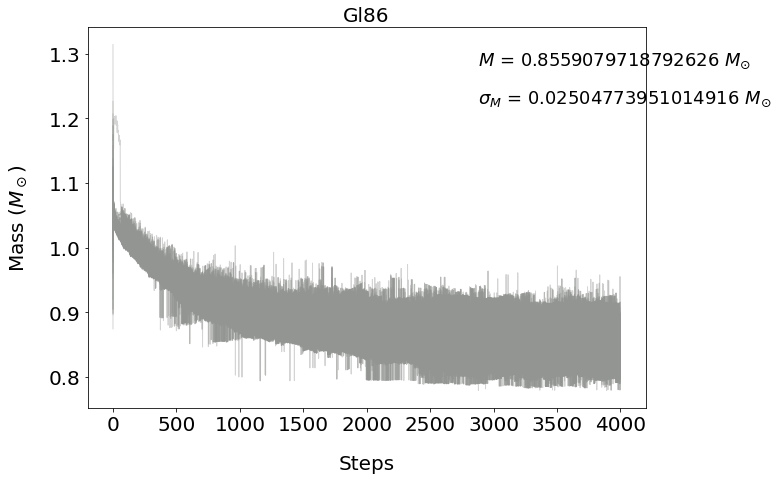

In [59]:
# Here, the complete chain (variable `chain`) for each variable is displaced
# In the corner plot, `chain_after_burnin` should be used instead
par = chain['mpri']
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
for i in range(par.shape[0]):
    ax.plot(par[i, :], c=sns.xkcd_rgb['grey'], alpha=0.4)
ax.set_title(source, fontsize=20)
ax.set_xlabel('Steps', fontsize=20)
ax.set_ylabel('Mass ($M_\odot$)', fontsize=20)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.annotate('$M$ = ' + str(np.mean(par[:, burnin:])) + ' $M_{\odot}$', 
             xy=(x0 + 0.7*(x1 - x0), y0 + 0.9*(y1 - y0)), fontsize=18)
ax.annotate('$\sigma_M$ = ' + str(np.std(par[:, burnin:])) + ' $M_{\odot}$', 
             xy=(x0 + 0.7*(x1 - x0), y0 + 0.8*(y1 - y0)), fontsize=18)

### Companion1 mass

Text(2879.2799999999997, 0.7570106980881648, '$\\sigma_M$ = 0.003048458957917566 $M_{\\odot}$')

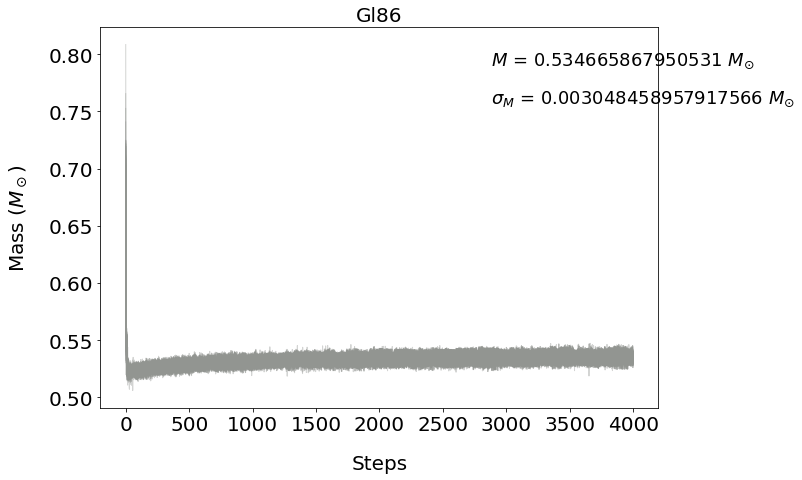

In [60]:
par = chain['msec0']
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
for i in range(par.shape[0]):
    ax.plot(par[i, :], c=sns.xkcd_rgb['grey'], alpha=0.4)
ax.set_title(source, fontsize=20)
ax.set_xlabel('Steps', fontsize=20)
ax.set_ylabel('Mass ($M_\odot$)', fontsize=20)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.annotate('$M$ = ' + str(np.mean(par[:, burnin:])) + ' $M_{\odot}$', 
             xy=(x0 + 0.7*(x1 - x0), y0 + 0.9*(y1 - y0)), fontsize=18)
ax.annotate('$\sigma_M$ = ' + str(np.std(par[:, burnin:])) + ' $M_{\odot}$', 
             xy=(x0 + 0.7*(x1 - x0), y0 + 0.8*(y1 - y0)), fontsize=18)

### Companion2 mass

Text(2879.2799999999997, 0.01105161129435391, '$\\sigma_M$ = 0.0009313418727615345 $M_{\\odot}$')

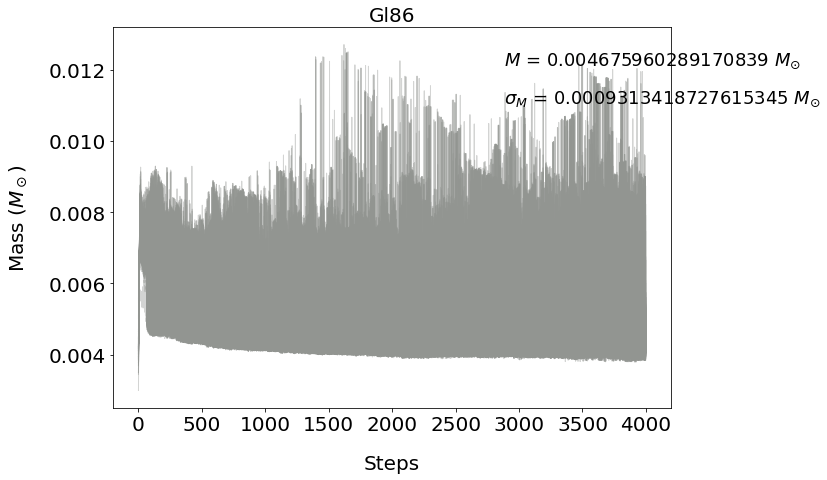

In [61]:
par = chain['msec1']
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
for i in range(par.shape[0]):
    ax.plot(par[i, :], c=sns.xkcd_rgb['grey'], alpha=0.4)
ax.set_title(source, fontsize=20)
ax.set_xlabel('Steps', fontsize=20)
ax.set_ylabel('Mass ($M_\odot$)', fontsize=20)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.annotate('$M$ = ' + str(np.mean(par[:, burnin:])) + ' $M_{\odot}$', 
             xy=(x0 + 0.7*(x1 - x0), y0 + 0.9*(y1 - y0)), fontsize=18)
ax.annotate('$\sigma_M$ = ' + str(np.std(par[:, burnin:])) + ' $M_{\odot}$', 
             xy=(x0 + 0.7*(x1 - x0), y0 + 0.8*(y1 - y0)), fontsize=18)

### Companion1 semi-major axis

Text(2879.2799999999997, 25.985190522324604, '$\\sigma_a$ = 0.15224966314412697 AU')

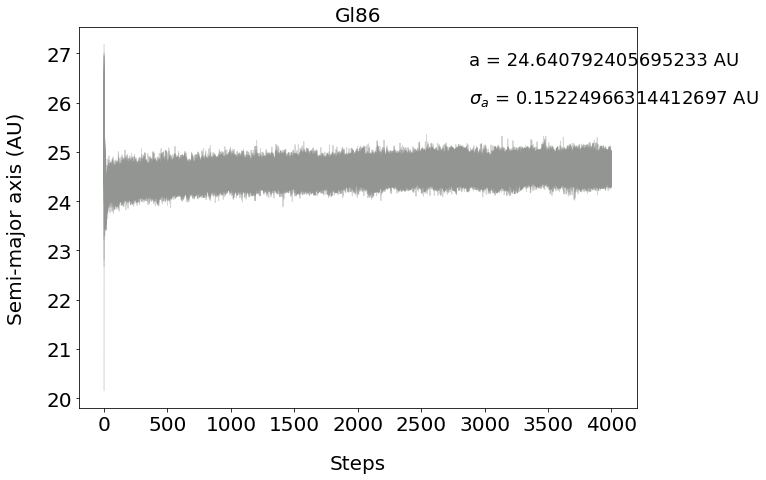

In [62]:
par = chain['sau0']
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
for i in range(par.shape[0]):
    ax.plot(par[i, :], c=sns.xkcd_rgb['grey'], alpha=0.4)
ax.set_title(source, fontsize=20)
ax.set_xlabel('Steps', fontsize=20)
ax.set_ylabel('Semi-major axis (AU)', fontsize=20)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.annotate('a = ' + str(np.mean(par[:, burnin:])) + ' AU', 
             xy=(x0 + 0.7*(x1 - x0), y0 + 0.9*(y1 - y0)), fontsize=18)
ax.annotate('$\sigma_a$ = ' + str(np.std(par[:, burnin:])) + ' AU', 
             xy=(x0 + 0.7*(x1 - x0), y0 + 0.8*(y1 - y0)), fontsize=18)

### Companion2 semi-major axis

Text(2879.2799999999997, 0.13962533145452807, '$\\sigma_a$ = 0.0011406303688766806 AU')

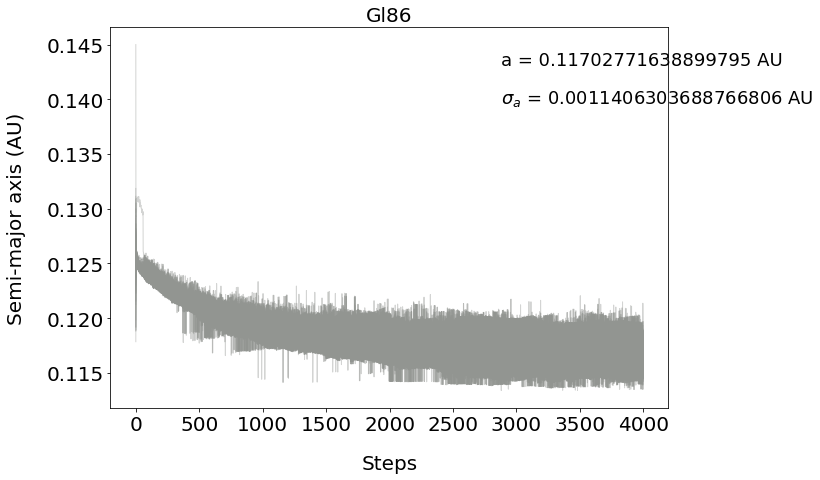

In [63]:
par = chain['sau1']
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
for i in range(par.shape[0]):
    ax.plot(par[i, :], c=sns.xkcd_rgb['grey'], alpha=0.4)
ax.set_title(source, fontsize=20)
ax.set_xlabel('Steps', fontsize=20)
ax.set_ylabel('Semi-major axis (AU)', fontsize=20)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.annotate('a = ' + str(np.mean(par[:, burnin:])) + ' AU', 
             xy=(x0 + 0.7*(x1 - x0), y0 + 0.9*(y1 - y0)), fontsize=18)
ax.annotate('$\sigma_a$ = ' + str(np.std(par[:, burnin:])) + ' AU', 
             xy=(x0 + 0.7*(x1 - x0), y0 + 0.8*(y1 - y0)), fontsize=18)

### Companion1 eccentricity

Text(2879.2799999999997, 0.5176177747228808, '$\\sigma_e$ = 0.012670867935789807')

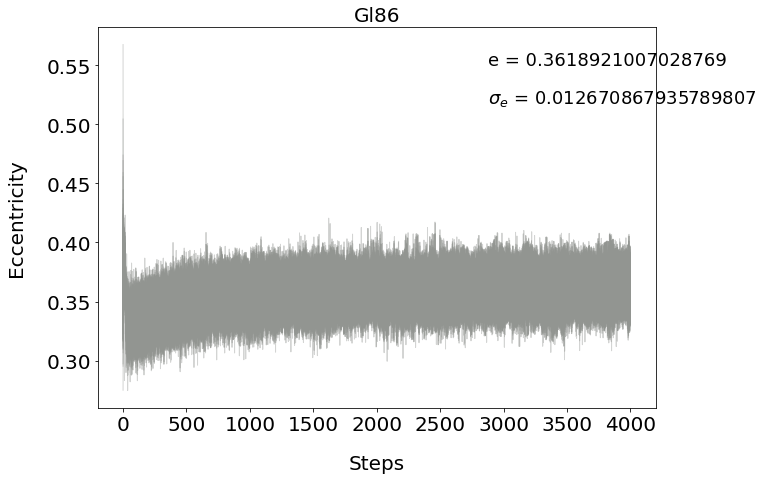

In [64]:
par = chain['esino0']**2 + chain['ecoso0']**2
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
for i in range(par.shape[0]):
    ax.plot(par[i, :], c=sns.xkcd_rgb['grey'], alpha=0.4)
ax.set_title(source, fontsize=20)
ax.set_xlabel('Steps', fontsize=20)
ax.set_ylabel('Eccentricity', fontsize=20)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.annotate('e = ' + str(np.mean(par[:, burnin:])), 
             xy=(x0 + 0.7*(x1 - x0), y0 + 0.9*(y1 - y0)), fontsize=18)
ax.annotate('$\sigma_e$ = ' + str(np.std(par[:, burnin:])), 
             xy=(x0 + 0.7*(x1 - x0), y0 + 0.8*(y1 - y0)), fontsize=18)

### Companion2 eccentricity

Text(2879.2799999999997, 0.13851281813671756, '$\\sigma_e$ = 0.0025537073756908505')

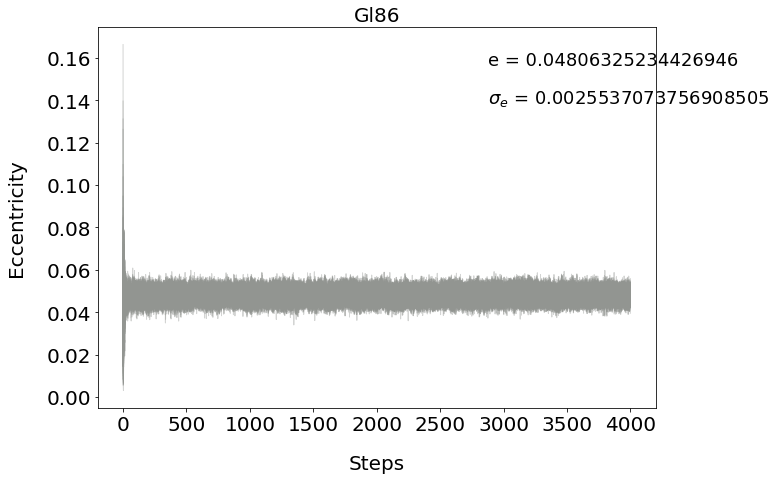

In [65]:
par = chain['esino1']**2 + chain['ecoso1']**2
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
for i in range(par.shape[0]):
    ax.plot(par[i, :], c=sns.xkcd_rgb['grey'], alpha=0.4)
ax.set_title(source, fontsize=20)
ax.set_xlabel('Steps', fontsize=20)
ax.set_ylabel('Eccentricity', fontsize=20)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.annotate('e = ' + str(np.mean(par[:, burnin:])), 
             xy=(x0 + 0.7*(x1 - x0), y0 + 0.9*(y1 - y0)), fontsize=18)
ax.annotate('$\sigma_e$ = ' + str(np.std(par[:, burnin:])), 
             xy=(x0 + 0.7*(x1 - x0), y0 + 0.8*(y1 - y0)), fontsize=18)

### Companion1 inclination

Text(2879.2799999999997, 2.2725790430107526, '$\\sigma_i$ = 0.46354028641947426 $^\\circ$')

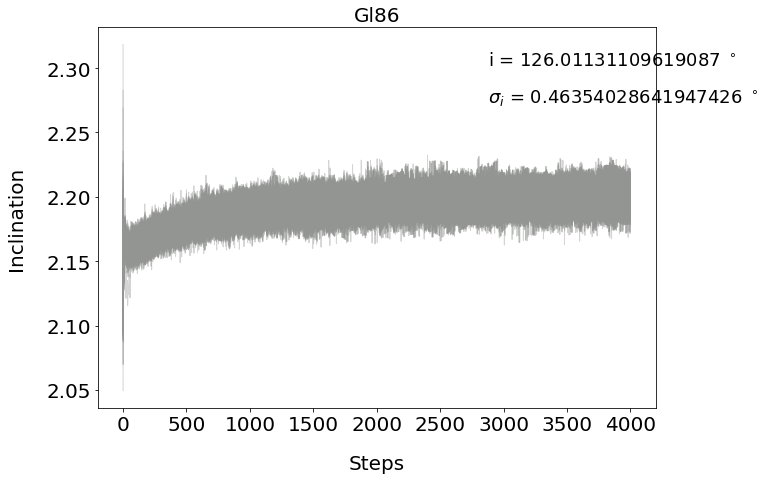

In [66]:
par = chain['inc0']
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
for i in range(par.shape[0]):
    ax.plot(par[i, :], c=sns.xkcd_rgb['grey'], alpha=0.4)
ax.set_title(source, fontsize=20)
ax.set_xlabel('Steps', fontsize=20)
ax.set_ylabel('Inclination', fontsize=20)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.annotate('i = ' + str(np.mean(par[:, burnin:]*180/np.pi)) + ' $^\circ$', 
             xy=(x0 + 0.7*(x1 - x0), y0 + 0.9*(y1 - y0)), fontsize=18)
ax.annotate('$\sigma_i$ = ' + str(np.std(par[:, burnin:]*180/np.pi)) + ' $^\circ$', 
             xy=(x0 + 0.7*(x1 - x0), y0 + 0.8*(y1 - y0)), fontsize=18)

### Companion2 inclination

Text(2879.2799999999997, 2.259624947589665, '$\\sigma_i$ = 26.615772361564883 $^\\circ$')

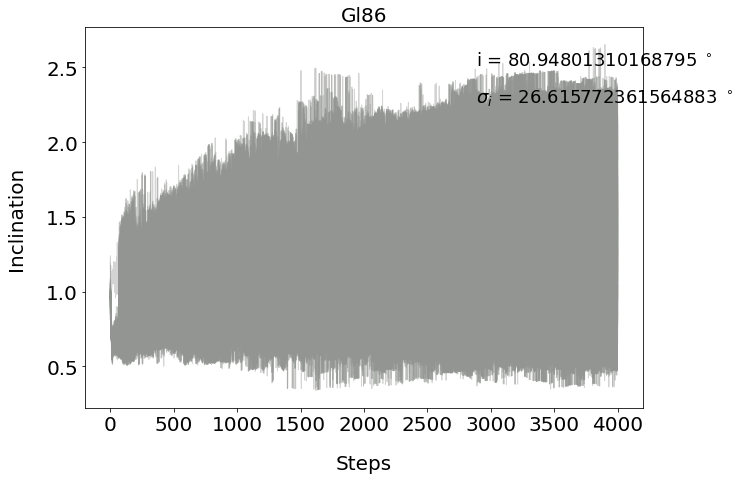

In [67]:
par = chain['inc1']
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
for i in range(par.shape[0]):
    ax.plot(par[i, :], c=sns.xkcd_rgb['grey'], alpha=0.4)
ax.set_title(source, fontsize=20)
ax.set_xlabel('Steps', fontsize=20)
ax.set_ylabel('Inclination', fontsize=20)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.annotate('i = ' + str(np.mean(par[:, burnin:]*180/np.pi)) + ' $^\circ$', 
             xy=(x0 + 0.7*(x1 - x0), y0 + 0.9*(y1 - y0)), fontsize=18)
ax.annotate('$\sigma_i$ = ' + str(np.std(par[:, burnin:]*180/np.pi)) + ' $^\circ$', 
             xy=(x0 + 0.7*(x1 - x0), y0 + 0.8*(y1 - y0)), fontsize=18)

### RV Jitter

Text(2879.2799999999997, 8.75716888457685, '$\\sigma_{jit}$ = 0.5488444756098273')

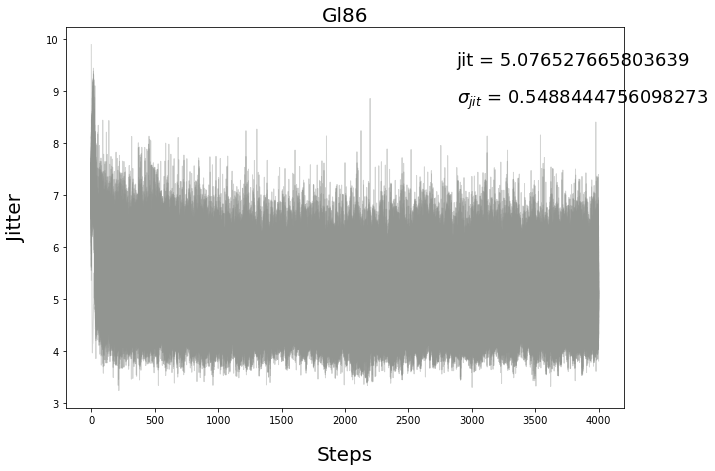

In [74]:
par = chain['jitter']
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
for i in range(par.shape[0]):
    ax.plot(par[i, :], c=sns.xkcd_rgb['grey'], alpha=0.4)
ax.set_title(source, fontsize=20)
ax.set_xlabel('Steps', fontsize=20)
ax.set_ylabel('Jitter', fontsize=20)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.annotate('jit = ' + str(np.mean(par[:, burnin:])), 
             xy=(x0 + 0.7*(x1 - x0), y0 + 0.9*(y1 - y0)), fontsize=18)
ax.annotate('$\sigma_{jit}$ = ' + str(np.std(par[:, burnin:])), 
             xy=(x0 + 0.7*(x1 - x0), y0 + 0.8*(y1 - y0)), fontsize=18)

In [69]:
mpri = chain['mpri']
print(mpri.shape)
msec0 = chain['msec0']
x = np.vstack([mpri, msec0])
print(x.shape)
print(np.shape(x.T))

(100, 4000)
(200, 4000)
(4000, 200)


## Corner Plots

In [70]:
# modify the corner plot code from t-brandt github
def plot_corner(chain, iplanet, msec_unit='solar', fname=None, kwargs_corner={}):
    rcParams["lines.linewidth"] = 1.0
    rcParams["axes.labelpad"] = 20.0
    rcParams["xtick.labelsize"] = 10.0
    rcParams["ytick.labelsize"] = 10.0

    npl = '%d' % (iplanet)
    mpri = chain['mpri']
    sau = chain['sau' + npl]
    ecc = chain['esino' + npl]**2 + chain['ecoso' + npl]**2
    inc = chain['inc' + npl]
#     omega = chain['omega' + npl]
    asc = chain['asc' + npl]
    lam = chain['lam' + npl]
    
    if msec_unit == 'solar':
        msec = chain['msec' + npl]   # in M_{\odot}
        msec_label = r'$\mathrm{M_{comp}\, (M_{\odot})}$'
    else:
        msec = chain['msec' + npl]*1989/1.898   # in M{\Jup}
        msec_label = r'$\mathrm{M_{comp}\, (M_{Jup})}$'

    chain = np.vstack([mpri, msec, sau, ecc, inc*180/np.pi, asc*180/np.pi, lam*180/np.pi]).T
    labels=[r'$\mathrm{M_{host}\, (M_{\odot})}$', msec_label, 'a (AU)', r'e', 
            r'$\mathrm{i\, (^{\circ})}$', r'$\mathrm{\Omega\, (^{\circ})}$', 
            r'lam $\mathrm{\, (^{\circ})}$']
    
    # in corner_modified, the error is modified to keep 2 significant figures
    fig = corner_modified.corner(chain, labels=labels, quantiles=[0.16, 0.5, 0.84], 
                                    range=[0.999 for l in labels], verbose=False, show_titles=True, 
                                    title_kwargs={"fontsize":12}, hist_kwargs={"lw":1.}, 
                                    label_kwargs={"fontsize":15}, xlabcord=(0.5,-0.45), ylabcord=(-0.45,0.5),  
                                    **kwargs_corner)
    
    fig.savefig('plots/' + fname)

### Companion1

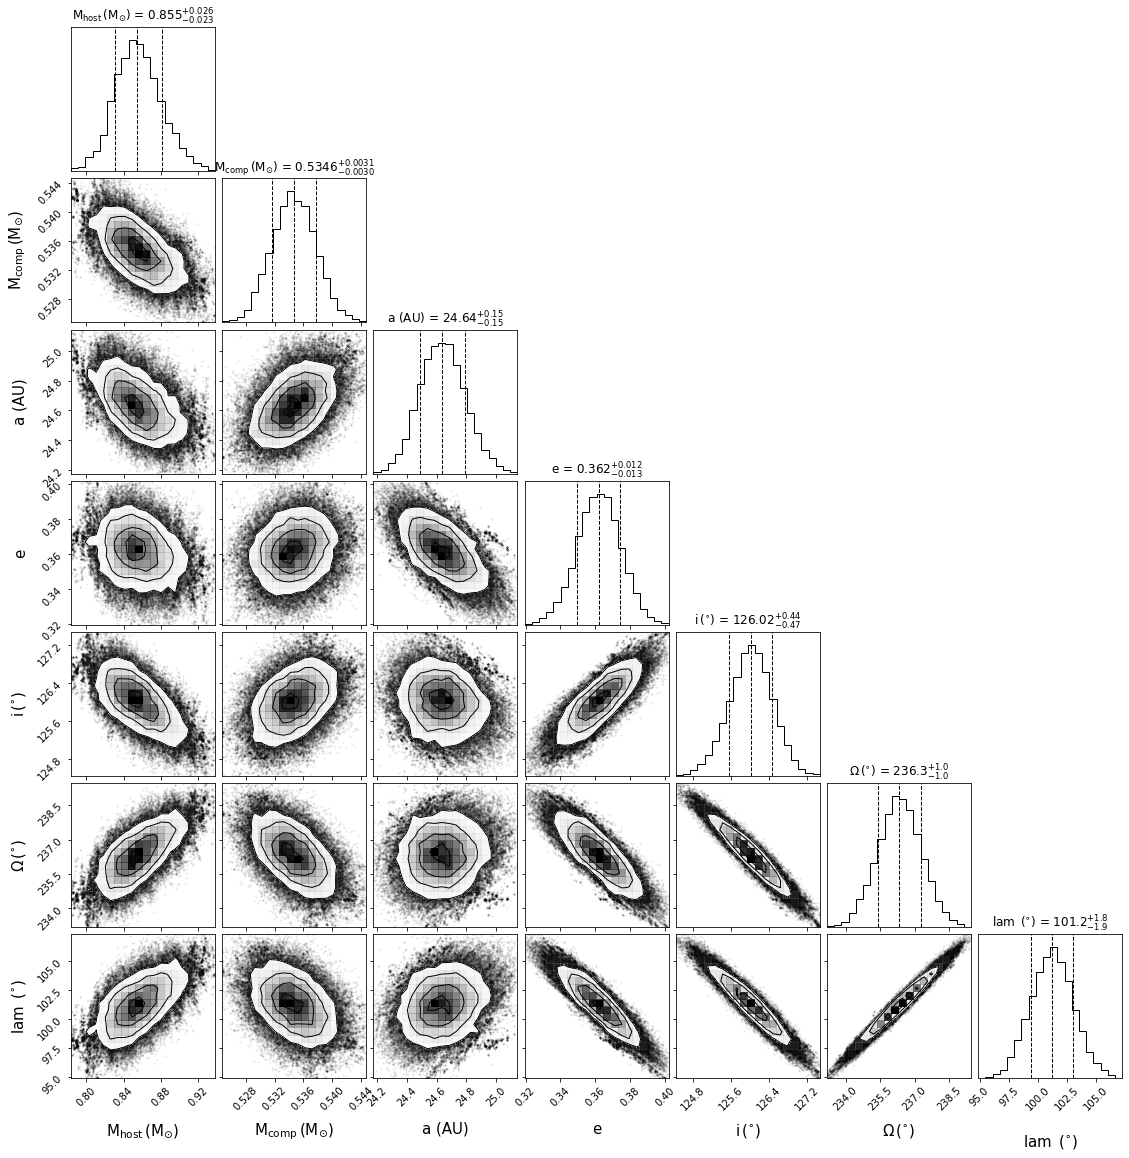

In [71]:
kwargs_others = {'iplanet':0, 'msec_unit':'solar', 'fname':'current_orbit_Gl86B/corner_B'}
plot_corner(chain_after_burnin, **kwargs_others)

### Companion2

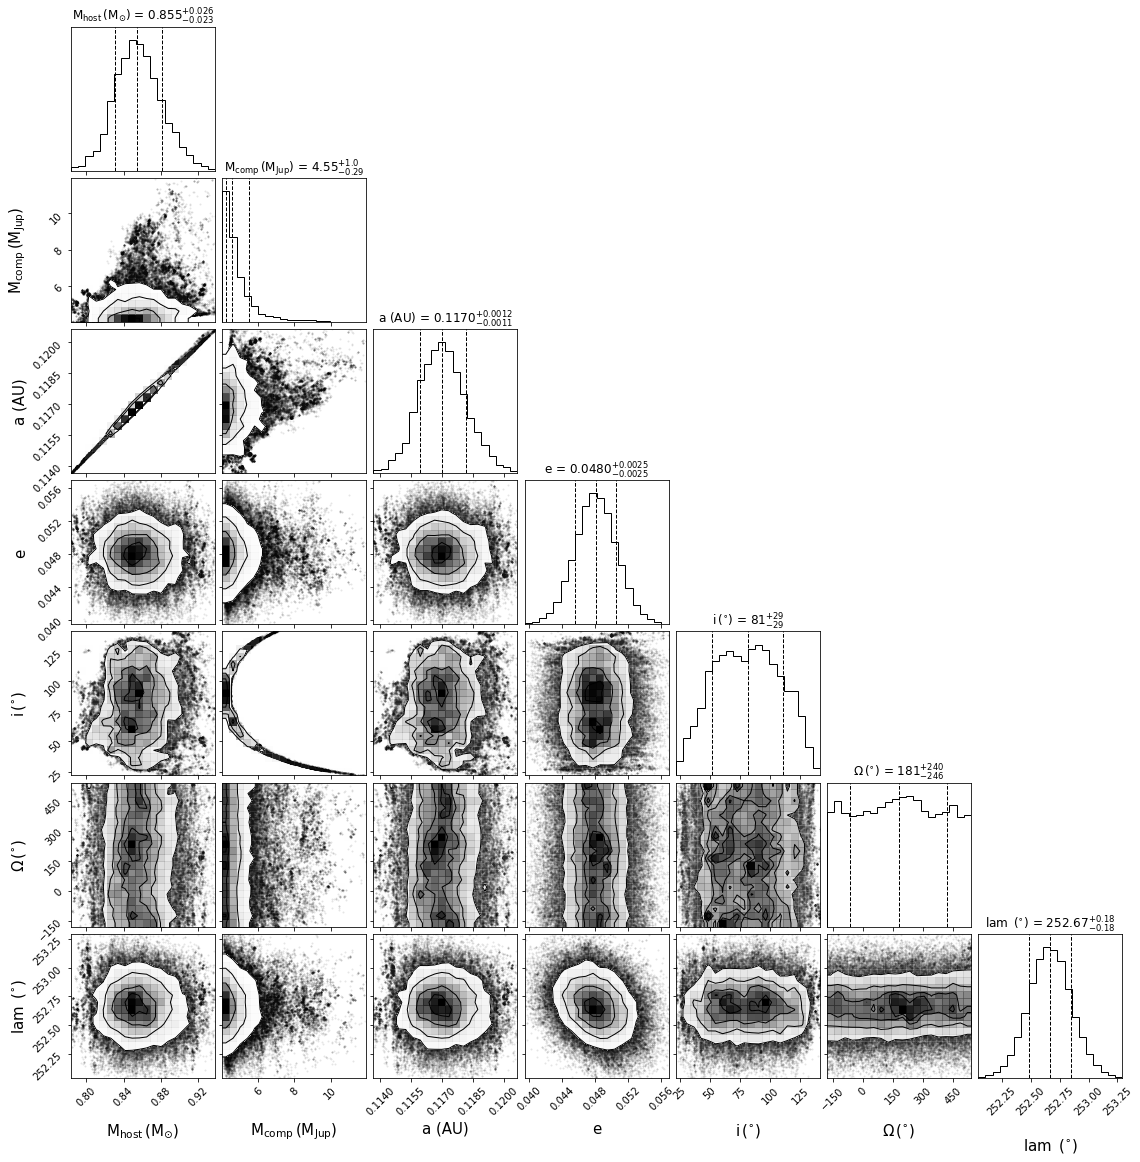

In [72]:
kwargs_others = {'iplanet':1, 'msec_unit':'jupiter', 'fname':'current_orbit_Gl86Ab/corner_Ab'}
plot_corner(chain_after_burnin, **kwargs_others)